# Displaying the /proc/pressure based metrics

In [7]:
# Loading event json
import json

# Plotting the timeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

## Memory with CPU-Intense

In [8]:
with open('smooth-signal-behaviour-mem.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(remote)" in line]

In [9]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['signal'] = [float(line.split()[5]) for line in filtered]

In [10]:
with open('smooth-signal-behaviour-mem.txt', 'r') as file:
    mem_events = [line.rstrip('\n') for line in file if "(container)" in line]
mem_events

['2025/05/21 00:41:27.940054 (container) start watching function',
 '2025/05/21 00:41:27.945779 (container) received subscribe stream',
 '2025/05/21 00:41:55.965610 (container) ContainerCreate: detected new container: 2025-05-21T00:41:55.961445953Z',
 '2025/05/21 00:41:56.201244 (container) TaskStart: detected task start: 2025-05-21T00:41:56.195698278Z',
 '2025/05/21 00:41:56.226489 (container) ContainerCreate: detected new container: 2025-05-21T00:41:56.223625772Z',
 '2025/05/21 00:41:56.355599 (container) TaskStart: detected task start: 2025-05-21T00:41:56.350897805Z',
 '2025/05/21 00:43:56.530972 (container) TaskExit: detected task exit: 2025-05-21T00:43:56.525660499Z',
 '2025/05/21 00:43:56.596688 (container) TaskDelete: detected task delete: 2025-05-21T00:43:56.591832776Z',
 '2025/05/21 00:43:58.097497 (container) TaskExit: detected task exit: 2025-05-21T00:43:58.094366597Z',
 '2025/05/21 00:43:58.156967 (container) TaskDelete: detected task delete: 2025-05-21T00:43:58.154678952Z'

In [11]:
with open('smooth-signal-behaviour-background.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]

In [12]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

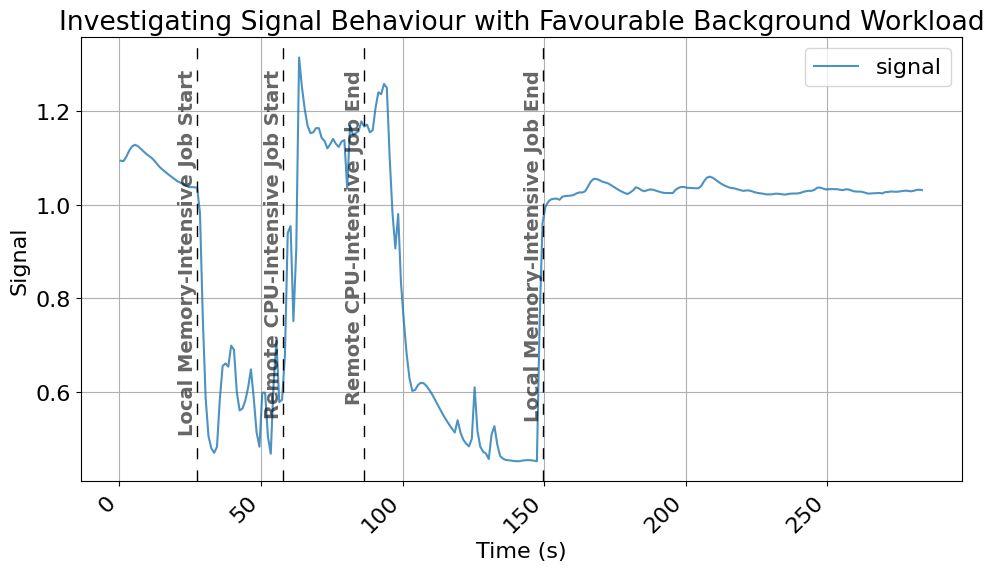

In [22]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(events[0].split()[1], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
pi_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in events]
mem_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in mem_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95


plt.axvline(x=pi_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[2], text_y_position, 'Remote CPU-Intensive Job Start',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=pi_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[-1], text_y_position, 'Remote CPU-Intensive Job End',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=mem_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(mem_job_time[2], text_y_position, 'Local Memory-Intensive Job Start',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=mem_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(mem_job_time[-1], text_y_position, 'Local Memory-Intensive Job End',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Investigating Signal Behaviour with Favourable Background Workload")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/signal-with-memory.png')
plt.show()

## CPU with CPU-Intense

In [23]:
with open('smooth-signal-behaviour-cpu.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(remote)" in line]

In [24]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['signal'] = [float(line.split()[5]) for line in filtered]

In [25]:
with open('smooth-signal-behaviour-cpu.txt', 'r') as file:
    cpu_events = [line.rstrip('\n') for line in file if "(container)" in line]

In [26]:
with open('smooth-signal-behaviour-cpu-background.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [27]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

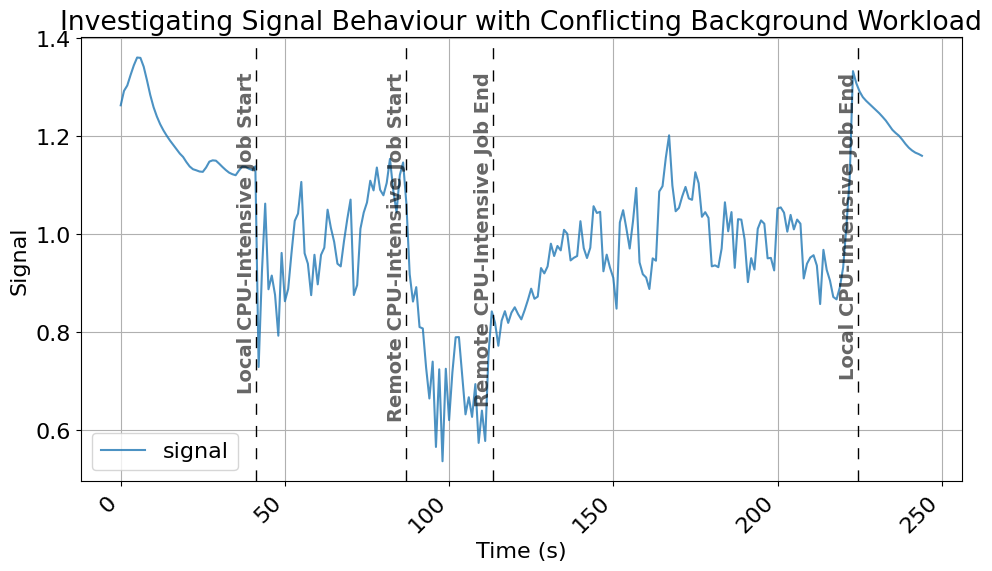

In [28]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(events[0].split()[1], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
pi_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in events]
cpu_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in cpu_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.rcParams['font.size'] = 16  

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95


plt.axvline(x=pi_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[2], text_y_position, 'Remote CPU-Intensive Job Start',
        rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=pi_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[-1], text_y_position, 'Remote CPU-Intensive Job End',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=cpu_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(cpu_job_time[2], text_y_position, 'Local CPU-Intensive Job Start',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')
plt.axvline(x=cpu_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(cpu_job_time[-1], text_y_position, 'Local CPU-Intensive Job End',
         rotation=90, va='top', ha='right', alpha=0.6, fontsize=14, weight='bold')

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Investigating Signal Behaviour with Conflicting Background Workload")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/signal-with-cpu.png')
plt.show()

## CPU with CPU-Intense

In [97]:
with open('smoother-signal-behaviour-cpu.txt', 'r') as file:
    filtered = [line.rstrip('\n') for line in file if "(remote)" in line]

In [98]:
data = {}
data['time'] = [line.split()[1] for line in filtered]
data['signal'] = [float(line.split()[5]) for line in filtered]

In [99]:
with open('smoother-signal-behaviour-cpu.txt', 'r') as file:
    cpu_events = [line.rstrip('\n') for line in file if "(container)" in line]

In [100]:
with open('smoother-signal-behaviour-cpu-background.txt', 'r') as file:
    events = [line.rstrip('\n') for line in file if "(container)" in line]


In [101]:
events_dict = {}
events_dict['create'] = [line.split()[1] for line in events if "ContainerCreate" in line]
events_dict['start'] = [line.split()[1] for line in events if "TaskStart" in line]
events_dict['exit'] = [line.split()[1] for line in events if "TaskExit" in line]
events_dict['delete'] = [line.split()[1] for line in events if "TaskDelete" in line]

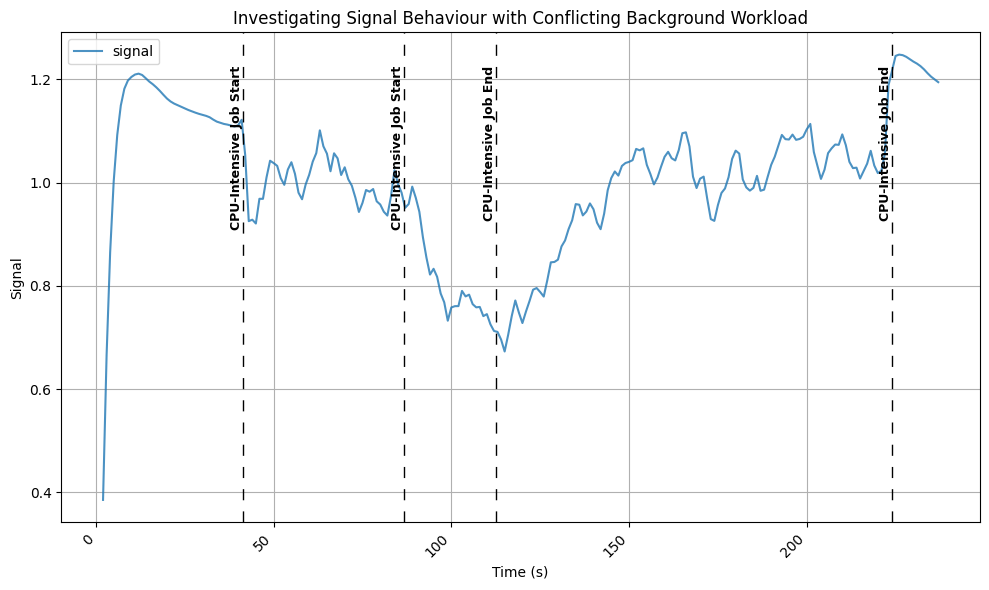

In [102]:
# 1. Parse time strings into datetime objects


start = datetime.strptime(events[0].split()[1], "%H:%M:%S.%f")
time_objects = [(datetime.strptime(t, "%H:%M:%S.%f") - start).total_seconds() for t in data['time']]
pi_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in events]
cpu_job_time = [(datetime.strptime(t.split()[1], "%H:%M:%S.%f") - start).total_seconds() for t in cpu_events]

# For plotting, matplotlib often works best with a reference date
# and the time difference from that date. Let's pick an arbitrary date.
#reference_date = datetime(1970, 1, 1)
#x_values = [(t - reference_date).total_seconds() for t in time_objects]

# Alternatively, matplotlib can often handle datetime objects directly on the x-axis
# if you format the plot correctly. Let's demonstrate that approach as it's more common.

# 2. Create the plot using matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for key in data.keys():
    if key == 'time':
        continue
    plt.plot(time_objects, data[key], label=key, alpha=.8)
#plt.plot(time_objects, data['cpu some'], linestyle='-')

ymin, ymax = plt.ylim()
text_y_position = ymax * 0.95


plt.axvline(x=pi_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[2], text_y_position, 'CPU-Intensive Job Start',
         rotation=90, va='top', ha='right', fontsize=9, weight='bold')
plt.axvline(x=pi_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(pi_job_time[-1], text_y_position, 'CPU-Intensive Job End',
         rotation=90, va='top', ha='right', fontsize=9, weight='bold')
plt.axvline(x=cpu_job_time[2], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(cpu_job_time[2], text_y_position, 'CPU-Intensive Job Start',
         rotation=90, va='top', ha='right', fontsize=9, weight='bold')
plt.axvline(x=cpu_job_time[-1], color='0', alpha=1, linestyle=(0, (8, 8)), linewidth=1)
plt.text(cpu_job_time[-1], text_y_position, 'CPU-Intensive Job End',
         rotation=90, va='top', ha='right', fontsize=9, weight='bold')

# count = 0
# for event in events_dict.keys():
#     # Assuming events[event] is a list of time strings for that event
#     event_times_objects = [datetime.strptime(t, "%H:%M:%S.%f") for t in events_dict[event]]
#     for event_time_obj in event_times_objects:
#         plt.axvline(x=event_time_obj, color='0.75', alpha=0.8, linestyle=(0, (8, 8)), linewidth=1, label= 'ContainerD Event' if count == 0 else "")
#         count += 1

# Customize the plot
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Investigating Signal Behaviour with Conflicting Background Workload")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Display the plot
plt.savefig('figures/signal-with-cpu.png')
plt.show()